### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# droped the car column as it has only 108 rows with data out of total 12684 entires
data = data.drop('car', axis=1)


KeyError: "['car'] not found in axis"

In [8]:
# Now finding the other columns null rows count
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [9]:
# now dropped the null rows from all the columns
data = data.dropna()

In [10]:
# checkinga gain the null rows to make sure data are clean
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [11]:
# Finding the count of Y and N
data['Y'].value_counts()

Y
1    6877
0    5202
Name: count, dtype: int64

In [13]:
# Finding the accepted count
accepted = data['Y'].sum()
accepted

6877

In [14]:
Finding the total count
total = len(data)
total

12079

In [15]:
# now divide the data to get the propotion of accepted against the total number
total_accepted_prop = accepted / total
total_accepted_prop

0.5693352098683666

In [16]:
coup_count = data['coupon'].value_counts()
coup_count

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

5. Use a bar plot to visualize the `coupon` column.

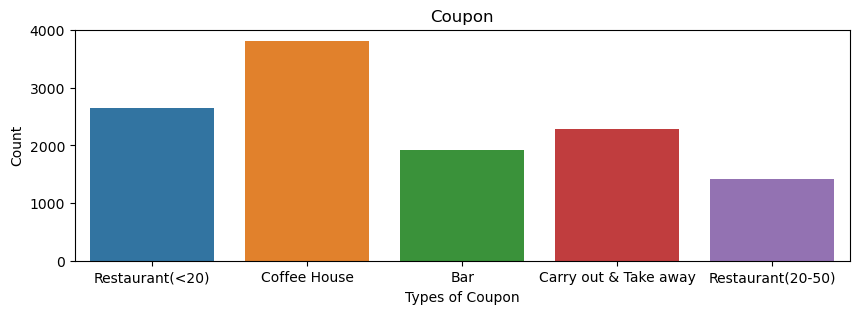

In [24]:
# Bar Plot for coupons data
plt.figure(figsize=(10, 3))
sns.countplot(data=data, x='coupon')
plt.title('Coupon')
plt.xlabel('Types of Coupon')
plt.ylabel('Count')
plt.show()


6. Use a histogram to visualize the temperature column.

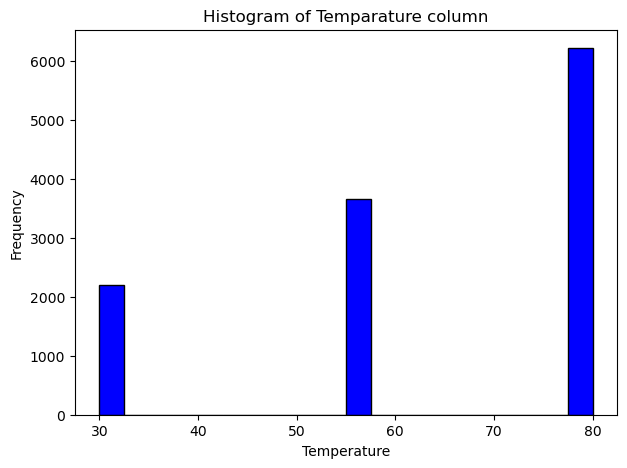

In [29]:
# Temparature data for histogram
plt.figure(figsize=(7, 5))
plt.hist(data['temperature'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temparature column')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [31]:
# new data frame for Bar
bar_dataframe = data[data['coupon'].str.contains('Bar')]
bar_dataframe.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [33]:
# total bar Y and N
bar_dataframe['Y'].value_counts()

Y
0    1125
1     788
Name: count, dtype: int64

In [34]:
# only Y
bar_acc_count = bar_dataframe['Y'].sum()
bar_acc_count

788

In [35]:
# total number
total = len(bar_dataframe)
total

1913

In [38]:
# bar coupon acceptance propotion
bar_prop_acc = bar_acc_count / total
bar_prop_acc

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [42]:
# bar goers count
bar_dataframe['Bar'].value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [44]:
# less than 3 times
bar_less_3_time_count = bar_dataframe[bar_dataframe['Bar'].isin(['never', 'less1', '1~3'])]

In [45]:
# more than 3 times
bar_more_3_time_count = bar_dataframe[bar_dataframe['Bar'].isin(['4~8', 'gt8'])]

In [46]:
# total accepted coupon
bar_less_3_time_count_acc = bar_less_3_time_count['Y'].sum()
bar_less_3_time_count_acc

641

In [47]:
# Total accepted coupon 
bar_more_3_time_count_acc = bar_more_3_time_count['Y'].sum()
bar_more_3_time_count_acc

147

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [48]:
# Age data
bar_dataframe['age'].value_counts()

age
21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: count, dtype: int64

In [52]:
# over 25 of age goes more than 1 time
bar_goers_over_21 = bar_dataframe[(bar_dataframe['Bar'].isin(['1~3', '4~8', 'gt8'])) 
                                  & (bar_dataframe['age'] != '21') & (bar_dataframe['age'] != 'below21')]                           


In [54]:
# less than 25 and goes 1 or never to the bar
bar_goers_rest = bar_dataframe[(bar_dataframe['Bar'].isin(['never', 'less1'])) |
                                   (bar_dataframe['age'] == 'below21') |
                                   (bar_dataframe['age'] == '21')]

In [55]:
# coupon accepted for this group
bar_goers_over_21_acc = bar_goers_over_21['Y'].mean()
bar_goers_over_21_acc

0.6898263027295285

In [56]:
Coupon acceptance rate for this group
bar_goers_rest_acc = bar_goers_rest['Y'].mean()
bar_goers_rest_acc

0.33774834437086093

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [61]:
# Drivers without kid passenger goes to bar
bar_goers_nokid = bar_dataframe[(bar_dataframe['Bar'].isin(['gt8', '1~3', '4~8'])) & 
                        (bar_dataframe['passanger'] != 'kid(s)') & 
                        (~bar_dataframe['occupation'].isin(['farming, fishing, or forestry']))]

In [62]:
# rest of the drivers
bar_goers_rest = bar_dataframe[(bar_dataframe['Bar'].isin(['0', 'less1'])) | 
                        (bar_dataframe['passanger'] == 'kid(s)') | 
                        (bar_dataframe['occupation'] == 'farming, fishing, or forestry')]

In [63]:
# Bar goes withoutkid coupon acceptance rate
bar_goers_acc = bar_goers_nokid['Y'].mean()
bar_goers_acc

0.6853146853146853

In [64]:
bar_goers_rest_acc = bar_goers_rest['Y'].mean()
bar_goers_rest_acc

0.44665461121157324

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [69]:
# Bar goers without kid and not widowed
bar_goers_notwid = bar_dataframe[(bar_dataframe['Bar'].isin(['gt8', '1~3', '4~8'])) & 
                      (bar_dataframe['passanger'] != 'kid(s)') & 
                      (~bar_dataframe['maritalStatus'].isin(['widowed']))]

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [70]:
# bar goers age 30 or more
bar_goers_30under = bar_dataframe[(bar_dataframe['Bar'].isin(['gt8', '1~3', '4~8'])) &
                        (bar_dataframe['age'] == '26') |
                        (bar_dataframe['age'] == '21') |
                         (bar_dataframe['age'] == 'below21')]

In [71]:
# Bar goers into the cheap restaurants 
bar_goers_cheap = bar_dataframe[(bar_dataframe['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
                        (bar_dataframe['income'] == '$37500 - $49999') |      
                        (bar_dataframe['income'] == '$25000 - $37499') |
                        (bar_dataframe['income'] == '$12500 - $24999') |
                        (bar_dataframe['income'] == 'Less than $12500')]

In [72]:
# Bar goers without kid and not widowed coupon acceptance rate
bar_goers_notwid_acc = bar_goers_notwid['Y'].mean()
bar_goers_notwid_acc

0.6853146853146853

In [73]:
# Bar goers under the age of 30 and more than once coupon acceptance rate
bar_goers_30under_acc = bar_goers_30under['Y'].mean()
bar_goers_30under_acc 

0.5588697017268446

In [74]:
# Bar goers in cheap restaurants coupon acceptance rate
bar_goers_cheap_acc  = bar_goers_cheap['Y'].mean()
bar_goers_cheap_acc

0.45

In [ ]:
# Young drivers goes bar more regularly than rest of the age group and also  accept the coupons. 
# Also they visits cheap restaurant more frequently than married with kid

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [99]:
# Investigating the Coffe goers coupon acceptance rate
# new data frame for Bar
coffee_dataframe = data[data['coupon'].str.contains('Coffee House')]
coffee_dataframe.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [100]:
coffee_dataframe['Y'].value_counts()


Y
0    1922
1    1894
Name: count, dtype: int64

In [101]:
coffee_acc_count = coffee_dataframe['Y'].sum()
coffee_acc_count

1894

In [102]:
totalcoffee = len(coffee_dataframe)
totalcoffee


3816

In [103]:
coffee_prop_acc = coffee_acc_count / totalcoffee
coffee_prop_acc

0.49633123689727465

In [104]:
coffee_dataframe['CoffeeHouse'].value_counts()

CoffeeHouse
less1    1052
1~3      1019
never     896
4~8       507
gt8       342
Name: count, dtype: int64

In [107]:
# goes for coffee 3 or less time
coffee_goer_less3 = coffee_dataframe[coffee_dataframe['CoffeeHouse'].isin(['less1', '1~3', 'never'])]

In [108]:
# goes for coffee 3 or more time
coffee_goer_more3 = coffee_dataframe[coffee_dataframe['CoffeeHouse'].isin(['4~8', 'gt8'])]

In [109]:
# 3 or less time Coffee goers coupon acceptance rate 
coffee_goer_less3_acc = coffee_goer_less3['Y'].mean()
coffee_goer_less3_acc

0.44590495449949447

In [110]:
# more than 3 time Coffee goers coupon acceptance rate 
coffee_goer_more3_acc = coffee_goer_more3['Y'].mean()
coffee_goer_more3_acc

0.6725559481743227

In [112]:
# more than 3 time coffee goers under the age of 30
coffee_goers_und30 = coffee_dataframe[coffee_dataframe['CoffeeHouse'].isin(['4~8', 'gt8']) & 
                        (coffee_dataframe['age'] == 'below21') |
                        (coffee_dataframe['age'] == '21') |
                        (coffee_dataframe['age'] == '26')]

In [113]:
# Coupon acceptance rate of more than 3 times and under age 30
coffee_goers_und30_acc = coffee_goers_und30['Y'].mean()
coffee_goers_und30_acc

0.5226460071513707

In [114]:
# 3 or less time coffee goers over the age of 30
coffee_goers_ovr30 = coffee_dataframe[coffee_dataframe['CoffeeHouse'].isin(['never', 'less1', '1~3']) & 
                        (coffee_dataframe['age'] != 'below21') |
                        (coffee_dataframe['age'] != '21') |
                        (coffee_dataframe['age'] != '26')]

In [116]:
coffee_goers_ovr30_acc = coffee_goers_ovr30['Y'].mean()
coffee_goers_ovr30_acc

0.49633123689727465

In [ ]:
# From the above trend, 4 time or more coffee goers are incliend to accept the coupon compare to drivers who goes less
# Age is not a big factor hear on the acceptance of coffee coupon though younger driver does slightly ahead over 30 age drivers